In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult(cleaned).csv')

In [4]:
x = df.drop('income', axis = 1)
y = df[['income']]

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

### Basic KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

accuracy : 0.8217795946768722
recall : 0.6030133146461107
precision : 0.6526355707243079
f1 : 0.6268439264250592
confusion matrix: [[7727  916]
 [1133 1721]]


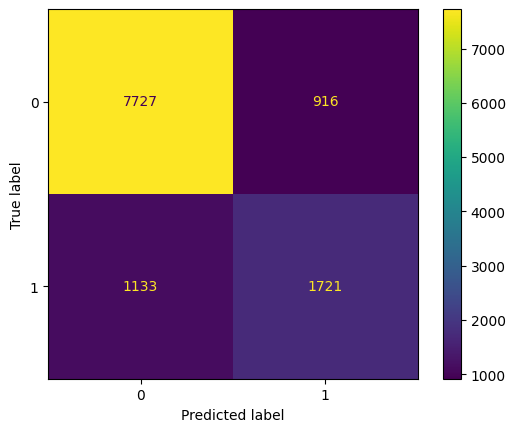

In [9]:
metrics(y_test, y_pred)

In [10]:
x = df.drop(['income'], axis = 1)
y = df[['income']]

x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

accuracy : 0.8337827259285031
recall : 0.5676243868255081
precision : 0.7052677405311275
f1 : 0.6290040768782761
confusion matrix: [[7966  677]
 [1234 1620]]


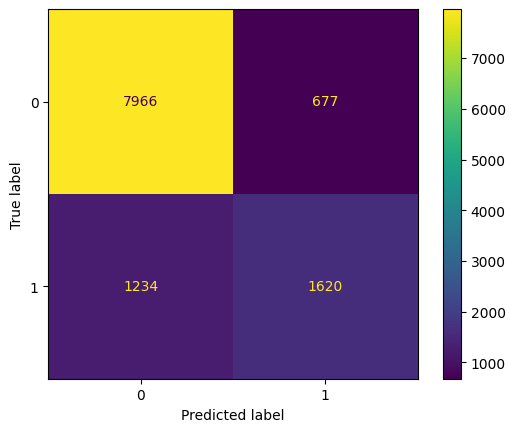

In [11]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

### Manhattan Distance and Uniform Weight

accuracy : 0.8379577281029834
recall : 0.5896986685353889
precision : 0.7086315789473684
f1 : 0.6437177280550774
confusion matrix: [[7951  692]
 [1171 1683]]


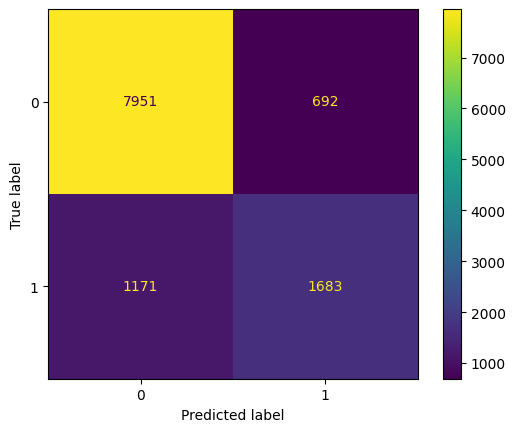

In [12]:
KNN = KNeighborsClassifier(n_neighbors=26, metric="manhattan", weights="uniform")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

#### ROC Curve

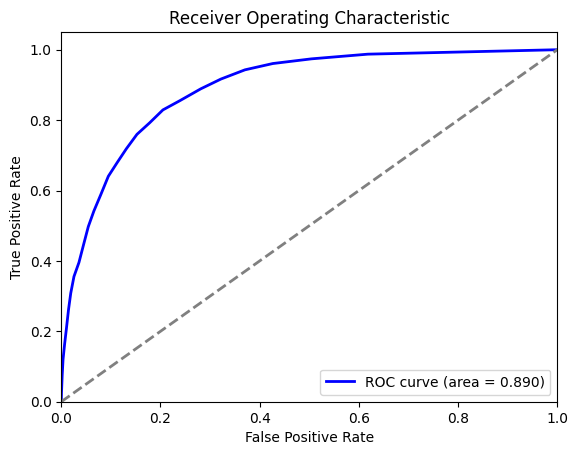

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = KNN.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### manhattan distance and distance as weight

accuracy : 0.8380447073149517
recall : 0.6156271899088998
precision : 0.6966693100713719
f1 : 0.6536458333333334
confusion matrix: [[7878  765]
 [1097 1757]]


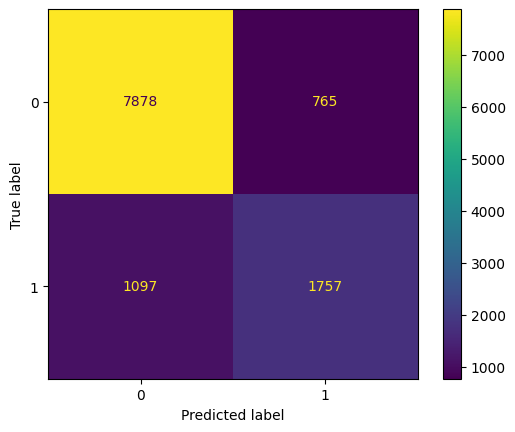

In [14]:
KNN = KNeighborsClassifier(n_neighbors=28, metric="manhattan", weights="distance")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

#### ROC Curve

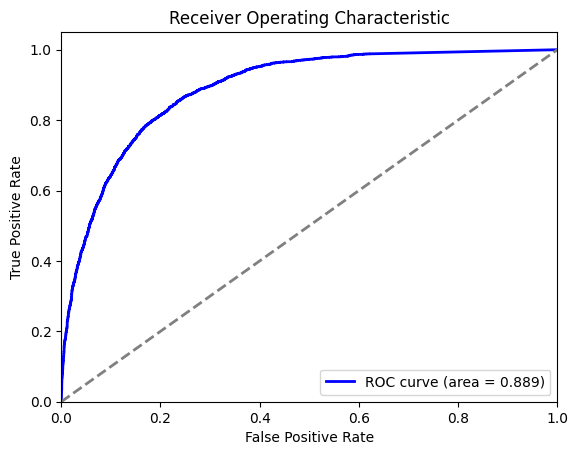

In [15]:
# Get the predicted probabilities for the test set
y_scores = KNN.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### With continous featured fixed of skewness only

In [16]:
df = pd.read_csv("adult(cleaned continuous only).csv")

In [17]:
dfFeature = pd.read_csv("best feature.csv")

In [18]:
feature = dfFeature['Feature'].iloc[:10]

In [19]:
x = df.drop(['income', 'education'], axis=1)
y = df[['income']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

accuracy : 0.8338697051404714
recall : 0.6159775753328661
precision : 0.6835147744945568
f1 : 0.6479911537043863
confusion matrix: [[7829  814]
 [1096 1758]]


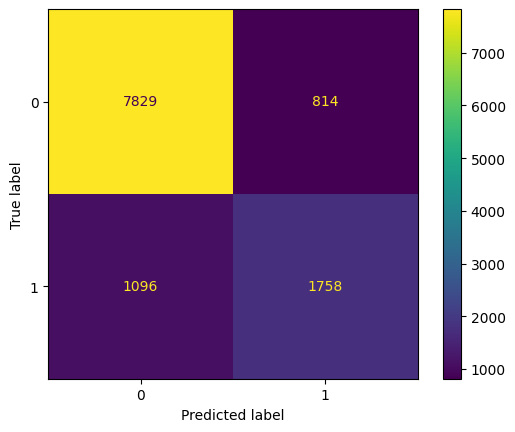

In [21]:
model = KNeighborsClassifier(n_neighbors=25, metric="manhattan", weights="distance")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics(y_test, y_pred)

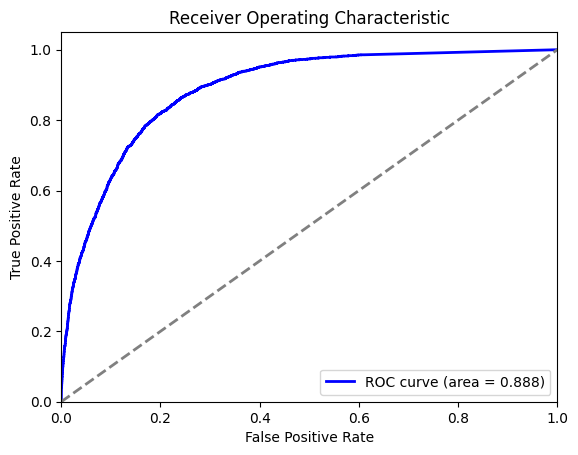

In [22]:
# Get the predicted probabilities for the test set
y_scores = model.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()